In [118]:
from chow_test import chow_test
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

# 구조변화 검정 (Chow - test)

공식

![screen](https://joshualoong.com/2018/01/05/Building-the-Python-chow-test-Package/chow-test-formula.png)

Where:

- RSSp is the residual sum of squares for the linear regression without breaks. (구조변화가 없는 선형회귀의 잔차제곱합)
- RSS1 and RSS2 equals the residual sum of squares for the linear regression lines represented by the data before and after the break point. (구조변화 시점 이전, 이후에 대한 잔차제곱합)
- k represents the number of breakpoints (구조변화의 개수 예상치)
- N1 and N2 equals the number of data points in RSS1 and RSS2 (구조변화 시점 이전, 이후의 데이터 개수)
- CHOW is an F-value that is compared to the rejection region (the F-critical value) as a hypothesis test (F값으로 계산산하여 기각역이 나오게 됨)

참고 : https://pypi.org/project/chowtest/

![screenshot](https://user-images.githubusercontent.com/87803612/160795117-bcd6538e-8348-4b89-b7df-4b3c26beeb27.png)



In [87]:
stock_price = yf.download(['^KS11','005930.KS'], '2000-01-01')
stock_price

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
               005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                     
2000-01-04   4675.783691  1059.040039    6110.0  1059.040039    6110.0   
2000-01-05   4270.190918   986.309998    5580.0   986.309998    6060.0   
2000-01-06   4300.801758   960.789978    5620.0   960.789978    5780.0   
2000-01-07   4239.580566   948.650024    5540.0   948.650024    5670.0   
2000-01-10   4415.592285   987.239990    5770.0   987.239990    5770.0   
...                  ...          ...       ...          ...       ...   
2022-03-24  69800.000000  2729.659912   69800.0  2729.659912   70300.0   
2022-03-25  69800.000000  2729.979980   69800.0  2729.979980   70200.0   
2022-03-28  69700.000000  2729.560059   69700.0  2729.560059   69900.0   
2022-03-29  70200.000000  2741.070068   70200.0  2741.070068   70300.0   
2022-03-30  69900.000000  2746.739990   69900.0  2746.739990   70500.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2000-01-04  1066.180054    5660.0  1016.590027    6000.0  1028.329956   
2000-01-05  1026.520020    5520.0   984.049988    5800.0  1006.869995   
2000-01-06  1014.900024    5580.0   953.500000    5750.0  1013.950012   
2000-01-07   970.159973    5360.0   930.840027    5560.0   949.169983   
2000-01-10   994.940002    5580.0   974.820007    5600.0   979.669983   
...                 ...       ...          ...       ...          ...   
2022-03-24  2729.659912   69600.0  2705.139893   69600.0  2716.250000   
2022-03-25  2740.949951   69600.0  2722.360107   70100.0  2740.830078   
2022-03-28  2737.459961   69200.0  2707.739990   69500.0  2721.219971   
2022-03-29  2754.179932   69800.0  2733.219971   70000.0  2745.620117   
2022-03-30  2760.600098   69800.0  2740.020020   70300.0  2758.310059   

              Volume            
           005930.KS     ^KS11  
Date                            
2000-01-04  74195000  195900.0  
2000-01-05  74680000  257700.0  
2000-01-06  54390000  203500.0  
2000-01-07  40305000  215700.0  
2000-01-10  46880000  240200.0  
...              ...       ...  
2022-03-24  37943357  959600.0  
2022-03-25  12986010  599800.0  
2022-03-28  12619289  768000.0  
2022-03-29  13686208  726700.0  
2022-03-30  12320723  840134.0  

[5585 rows x 12 columns]

In [97]:
structure_point = stock_price.loc[stock_price.index == '2008-09-16']
structure_point

Adj Close              Close               High               \
              005930.KS    ^KS11 005930.KS    ^KS11 005930.KS        ^KS11   
Date                                                                         
2008-09-16  8229.277344  1387.75   10500.0  1387.75   10520.0  1401.790039   

                 Low                   Open                Volume            
           005930.KS        ^KS11 005930.KS       ^KS11 005930.KS     ^KS11  
Date                                                                         
2008-09-16   10180.0  1372.550049   10200.0  1381.23999  41059050  392800.0

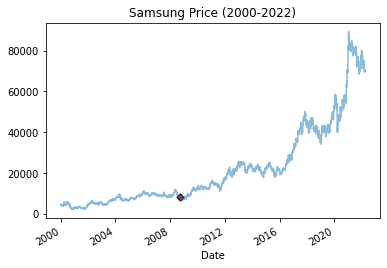

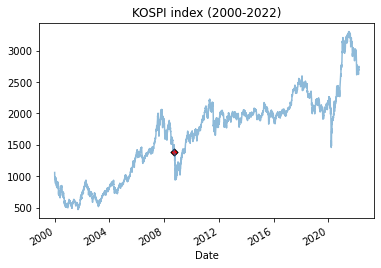

In [103]:
# 삼성 주가 그래프 + 구조 변화 예상 시점
stock_price['Adj Close']['005930.KS'].plot(alpha=.5)
plt.scatter(structure_point.index, 
            structure_point['Adj Close']['005930.KS'], 
            color='red', 
            marker = 'D', 
            s = 25,
            edgecolor = 'k' )
plt.title('Samsung Price (2000-2022)')
plt.show()

# KOSPI 지수 그래프 + 구조 변화 예상 시점
stock_price['Adj Close']['^KS11'].plot(alpha=.5)
plt.scatter(structure_point.index, 
            structure_point['Adj Close']['^KS11'], 
            color='red', 
            marker = 'D', 
            s = 25,
            edgecolor = 'k' )
plt.title('KOSPI index (2000-2022)')
plt.show()

In [40]:
# 컬럼 명 수정하기
col_names = stock_price.columns
new_names = []
for i in range(len(col_names)):
    new_names.append(col_names[i][0] + '_' + col_names[i][1])
stock_price.columns = new_names
stock_price.head()

,Adj Close_005930.KS,Adj Close_^KS11,Close_005930.KS,Close_^KS11,High_005930.KS,High_^KS11,Low_005930.KS,Low_^KS11,Open_005930.KS,Open_^KS11,Volume_005930.KS,Volume_^KS11
Date,,,,,,,,,,,,
2000-01-04,4675.783691,1059.040039,6110.0,1059.040039,6110.0,1066.180054,5660.0,1016.590027,6000.0,1028.329956,74195000,195900.0
2000-01-05,4270.191895,986.309998,5580.0,986.309998,6060.0,1026.520020,5520.0,984.049988,5800.0,1006.869995,74680000,257700.0
2000-01-06,4300.802734,960.789978,5620.0,960.789978,5780.0,1014.900024,5580.0,953.500000,5750.0,1013.950012,54390000,203500.0
2000-01-07,4239.579590,948.650024,5540.0,948.650024,5670.0,970.159973,5360.0,930.840027,5560.0,949.169983,40305000,215700.0
2000-01-10,4415.592285,987.239990,5770.0,987.239990,5770.0,994.940002,5580.0,974.820007,5600.0,979.669983,46880000,240200.0


In [72]:
# 월말 영업일 데이터만 추출하는 부분

# 데이터 인덱스(날짜)를 컬럼으로 형성 후 처음과 끝을 추출
stock_price = stock_price.reset_index()
start_date = stock_price['Date'].astype(str).iloc[0]
end_date = stock_price['Date'].astype(str).iloc[-1]

# 날짜 처음과 끝에서 영업일 기준 freq 적용 후 데이터 프레임 형성
date_all = pd.date_range(start_date, end_date, freq='B').to_frame().rename(columns={0:'Date'}).reset_index(drop=True)
date_all

,Date
0,2000-01-04
1,2000-01-05
2,2000-01-06
3,2000-01-07
4,2000-01-10
...,...
5797,2022-03-24
5798,2022-03-25
5799,2022-03-28
5800,2022-03-29


In [73]:
# 데이터 병합 (영업일 date와 kospi 병합)
stock_price_all = pd.merge(date_all,stock_price,how='left')
print(f'Nan값 개수 확인 : {stock_price_all["Close_^KS11"].isna().value_counts()[1]}')

Nan값 개수 확인 : 317


In [74]:
# 직전 값으로 NaN 값 채우기
stock_price_all = stock_price_all.fillna(method='ffill')

print('Nan값 개수 확인')
print(stock_price_all["Close_^KS11"].isna().value_counts())

Nan값 개수 확인
False    5802
Name: Close_^KS11, dtype: int64


In [75]:
print(f'예상되는 구조변화 시점의 index 값 (리먼브라더스 파산신청) : 2270, ({stock_price_all.Date[2270]})')

stock_price_all.loc[stock_price_all.index ==2270]

예상되는 구조변화 시점의 index 값 (리먼브라더스 파산신청) : 2270, (2008-09-16 00:00:00)


,Date,level_0,index,Adj Close_005930.KS,Adj Close_^KS11,Close_005930.KS,Close_^KS11,High_005930.KS,High_^KS11,Low_005930.KS,Low_^KS11,Open_005930.KS,Open_^KS11,Volume_005930.KS,Volume_^KS11
2270,2008-09-16,2237.0,2237.0,8229.279297,1387.75,10500.0,1387.75,10520.0,1401.790039,10180.0,1372.550049,10200.0,1381.23999,41059050.0,392800.0


In [76]:
# 구조변화 검정 시행
chow_test(stock_price_all['Adj Close_^KS11'] ,stock_price_all['Adj Close_005930.KS'], 2270, 2271, .05)

Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 3442.51214914471, P_value: 1.1102230246251565e-16


(3442.51214914471, 1.1102230246251565e-16)

## 검정 결과

- 두 기간 (리만브라더스 사태 전, 후)에 대해 선형회귀 계수가 같다는 귀무가설을 매우 유의하게 기각할 수 있음


In [110]:
import statsmodels.api as sm

model = sm.OLS(stock_price_all['Adj Close_^KS11'] ,stock_price_all['Adj Close_005930.KS']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Adj Close_^KS11   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                          2.491e+04
Date:                Wed, 30 Mar 2022   Prob (F-statistic):                        0.00
Time:                        18:49:50   Log-Likelihood:                         -46865.
No. Observations:                5802   AIC:                                  9.373e+04
Df Residuals:                    5801   BIC:                                  9.374e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Adj Close_005930.KS     0.0549      0.000    157.836      0.000       0.054       0.056
==============================================================================
Omnibus:                     1115.385   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1935.255
Skew:                          -1.249   Prob(JB):                         0.00
Kurtosis:                       4.329   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

결정계수 R-squared :  0.81112
feature coef(계수)에 대한 p 값 :  0.00000
잔차의 제곱합 MSE :  607515.11801


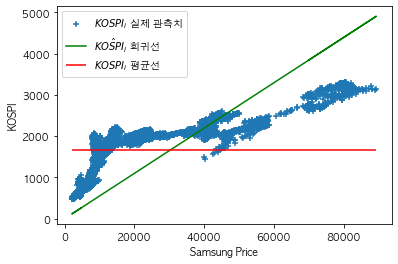

In [120]:
# 통계치 출력
print(f'결정계수 R-squared : {model.rsquared : .5f}')
print(f'feature coef(계수)에 대한 p 값 : {model.pvalues[0] : .5f}')
print(f'잔차의 제곱합 MSE : {model.mse_resid : .5f}')

# 회귀선 도출
target_pred1 = model.predict()

plt.scatter(stock_price_all['Adj Close_005930.KS'], stock_price_all['Adj Close_^KS11'], marker='+', label='$KOSPI_i$ 실제 관측치')
plt.plot(stock_price_all['Adj Close_005930.KS'], target_pred1, color = 'g', label='$\hat{KOSPI}_i$ 회귀선')
plt.hlines(stock_price_all['Adj Close_^KS11'].mean(), stock_price_all['Adj Close_005930.KS'].min(), stock_price_all['Adj Close_005930.KS'].max(), color = 'r', label='$KOSPI_i$ 평균선')
plt.legend()
plt.xlabel('Samsung Price')
plt.ylabel('KOSPI')
plt.show()

In [111]:
before = stock_price_all.loc[stock_price_all.index <=2270]
after  = stock_price_all.loc[stock_price_all.index > 2270]

In [112]:
model_before = sm.OLS(before['Adj Close_^KS11'] ,before['Adj Close_005930.KS']).fit()
model_before.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Adj Close_^KS11   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                          4.942e+04
Date:                Wed, 30 Mar 2022   Prob (F-statistic):                        0.00
Time:                        18:49:53   Log-Likelihood:                         -15589.
No. Observations:                2271   AIC:                                  3.118e+04
Df Residuals:                    2270   BIC:                                  3.119e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Adj Close_005930.KS     0.1497      0.001    222.299      0.000       0.148       0.151
==============================================================================
Omnibus:                      264.135   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              378.800
Skew:                           0.874   Prob(JB):                     5.55e-83
Kurtosis:                       3.974   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

결정계수 R-squared :  0.95608
feature coef(계수)에 대한 p 값 :  0.00000
잔차의 제곱합 MSE :  53719.08484


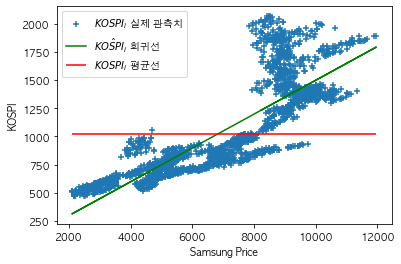

In [122]:
# 통계치 출력
print(f'결정계수 R-squared : {model_before.rsquared : .5f}')
print(f'feature coef(계수)에 대한 p 값 : {model_before.pvalues[0] : .5f}')
print(f'잔차의 제곱합 MSE : {model_before.mse_resid : .5f}')

# 회귀선 도출
target_pred1 = model_before.predict()

plt.scatter(before['Adj Close_005930.KS'], before['Adj Close_^KS11'], marker='+', label='$KOSPI_i$ 실제 관측치')
plt.plot(before['Adj Close_005930.KS'], target_pred1, color = 'g', label='$\hat{KOSPI}_i$ 회귀선')
plt.hlines(before['Adj Close_^KS11'].mean(), before['Adj Close_005930.KS'].min(), before['Adj Close_005930.KS'].max(), color = 'r', label='$KOSPI_i$ 평균선')
plt.legend()
plt.xlabel('Samsung Price')
plt.ylabel('KOSPI')
plt.show()

In [114]:
model_after = sm.OLS(after['Adj Close_^KS11'] ,after['Adj Close_005930.KS']).fit()
model_after.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Adj Close_^KS11   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                          2.072e+04
Date:                Wed, 30 Mar 2022   Prob (F-statistic):                        0.00
Time:                        18:50:07   Log-Likelihood:                         -28654.
No. Observations:                3531   AIC:                                  5.731e+04
Df Residuals:                    3530   BIC:                                  5.732e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Adj Close_005930.KS     0.0526      0.000    143.946      0.000       0.052       0.053
==============================================================================
Omnibus:                      377.721   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.561
Skew:                          -0.912   Prob(JB):                    3.32e-109
Kurtosis:                       2.742   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

결정계수 R-squared :  0.85444
feature coef(계수)에 대한 p 값 :  0.00000
잔차의 제곱합 MSE :  654921.18193


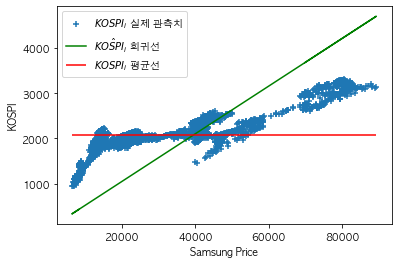

In [125]:
# 통계치 출력
print(f'결정계수 R-squared : {model_after.rsquared : .5f}')
print(f'feature coef(계수)에 대한 p 값 : {model_after.pvalues[0] : .5f}')
print(f'잔차의 제곱합 MSE : {model_after.mse_resid : .5f}')

# 회귀선 도출
target_pred1 = model_after.predict()

plt.scatter(after['Adj Close_005930.KS'], after['Adj Close_^KS11'], marker='+', label='$KOSPI_i$ 실제 관측치')
plt.plot(after['Adj Close_005930.KS'], target_pred1, color = 'g', label='$\hat{KOSPI}_i$ 회귀선')
plt.hlines(after['Adj Close_^KS11'].mean(), after['Adj Close_005930.KS'].min(), after['Adj Close_005930.KS'].max(), color = 'r', label='$KOSPI_i$ 평균선')
plt.legend()
plt.xlabel('Samsung Price')
plt.ylabel('KOSPI')
plt.show()